# Clone github repository

In [ ]:
%rm -rf 'dl_with_torch'
!git clone https://github.com/sadhana1058/dl_with_torch.git

Cloning into 'dl_with_torch'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 64 (delta 12), reused 48 (delta 6), pack-reused 0
Unpacking objects: 100% (64/64), done.


In [ ]:
%cd /content/dl_with_torch/

/content/dl_with_torch


In [ ]:
import sys
sys.path.append('/dl_with_torch/')

!pip install git+https://github.com/albumentations-team/albumentations.git

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-36g76x1i
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-36g76x1i
     |████████████████████████████████| 47.6 MB 2.2 MB/s 
  Created wheel for albumentations: filename=albumentations-1.1.0-py3-none-any.whl size=103647 sha256=82c91360014b5a1b57b4b9b025d4cea765609c9eeea3a0a35efa08e1429ea77f
  Stored in directory: /tmp/pip-ephem-wheel-cache-2_bdpo_3/wheels/09/5b/e0/38cb85186b3cb979092395de69893163f9a223a72066123599
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
pip install torch-lr-finder

# Libraries 

In [ ]:
from models.custom_resnet import CustomResnet
from src.GradCAM.visualization import VisualizeCam
from src.accuracy import *
from src.data_augmentation import *
from src.plot_train_test_acc_loss import *
from src.misclassification import *
from utils.utils import *
from utils import util
from main import *

In [ ]:
import torch
import os

print(os.getcwd())

/content/dl_with_torch


In [ ]:
!pip install torchsummary
!pip install -U albumentations

from torchsummary import summary
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
from torchvision.utils import make_grid
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
from torch_lr_finder import LRFinder
%matplotlib inline

# CUDA Availablity

In [ ]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


# Model Summary

In [ ]:
device = torch.device("cuda" if use_cuda else "cpu")
model = CustomResnet().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

# Before data augmentation

In [ ]:
trainset = Cifar10Dataset(root='../data', train=True,download=True)#, transform=train_transforms) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

testset = Cifar10Dataset(root='../data', train=False,download=True)#, transform=test_transforms) 
testloader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,shuffle=True, **args().kwargs)


Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([256, 3, 32, 32])


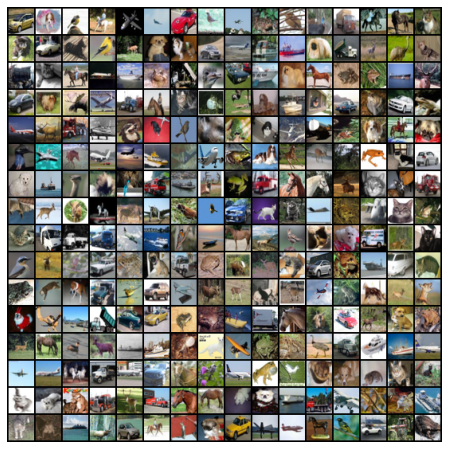

In [ ]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

# Train and testloaders

In [ ]:
train_transforms = getTrainTransforms()
test_transforms = getTestTransforms()

class args():
    def __init__(self,device = 'cpu' ,use_cuda = False) -> None:
        self.batch_size = 512
        self.device = device
        self.use_cuda = use_cuda
        self.kwargs = {'num_workers': 1, 'pin_memory': True} if self.use_cuda else {}

trainset = Cifar10Dataset(root='../data', train=True,download=True, transform=train_transforms) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

testset = Cifar10Dataset(root='../data', train=False,download=True, transform=test_transforms) 
testloader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


# After data augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([512, 3, 32, 32])


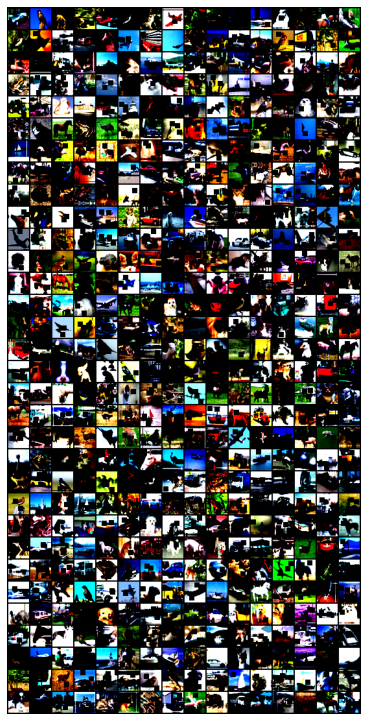

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(26,13))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

# Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Classwise accuracy

In [ ]:
classes = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]
Accuracy.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of airplanes : 94 %
Accuracy of  cars : 97 %
Accuracy of birds : 89 %
Accuracy of  cats : 82 %
Accuracy of  deer : 93 %
Accuracy of  dogs : 87 %
Accuracy of frogs : 95 %
Accuracy of horses : 93 %
Accuracy of ships : 95 %
Accuracy of trucks : 94 %






# GradCam and misclassified images

In [ ]:
model = CustomResnet().to(device)

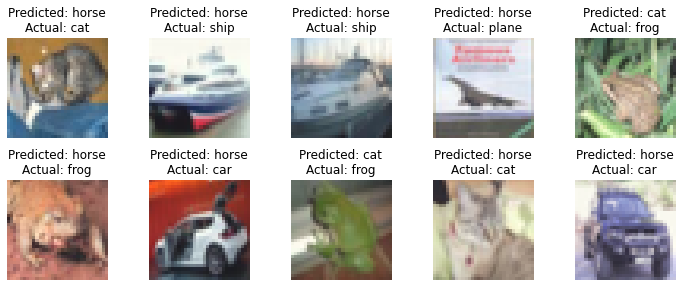

In [ ]:
incorrect_images = identify_incorrectly_labelled_images(model, criterion, device, testloader, 10)
denormalize = utils.denormalize
plot_images(incorrect_images, classes)

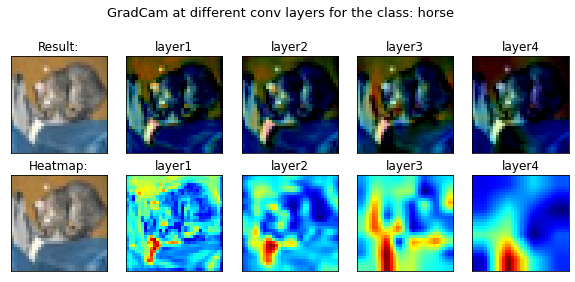

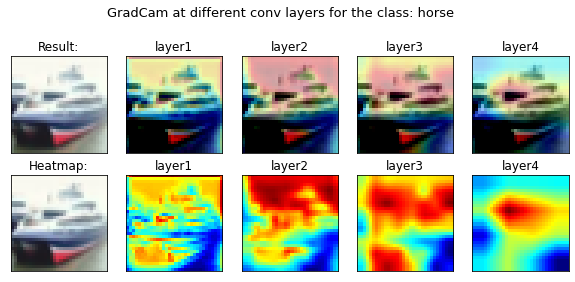

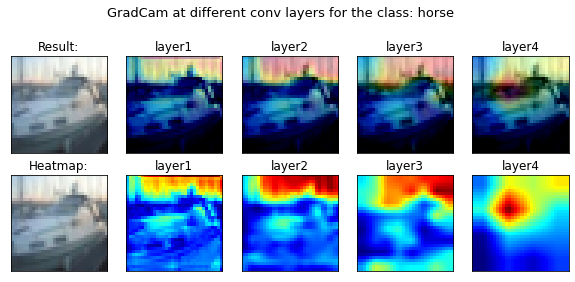

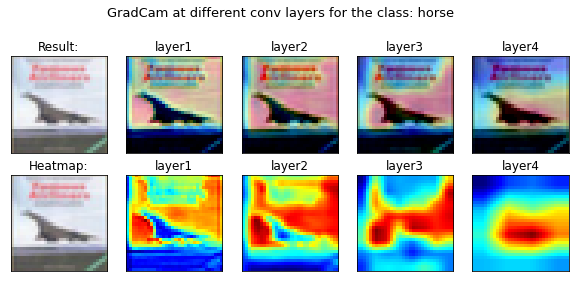

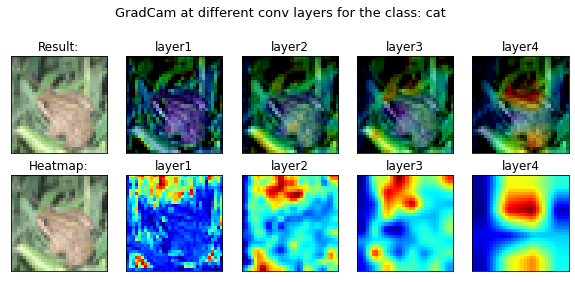

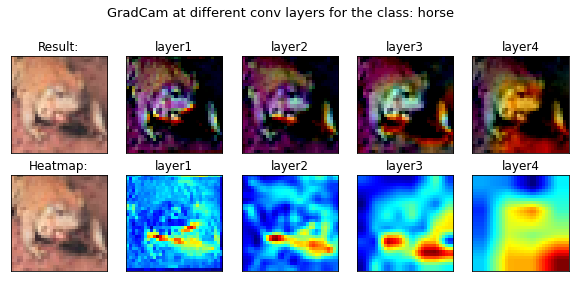

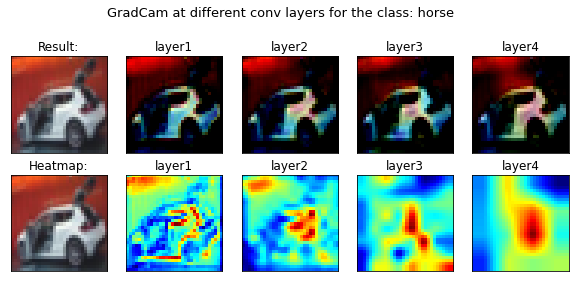

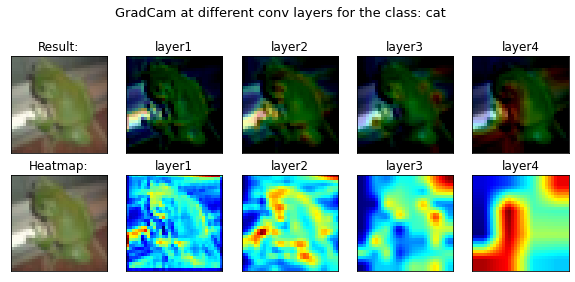

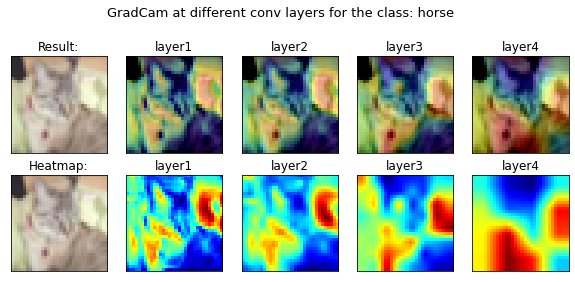

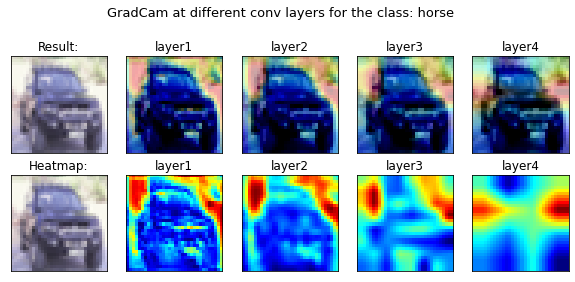

In [ ]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(model,classes, target_layers)
incorrect_pred_imgs = []
for i in range(10):
  incorrect_pred_imgs.append(torch.as_tensor(incorrect_images[i]["img"]))
viz_cam(torch.stack(incorrect_pred_imgs), target_layers, metric="incorrect")


# Finding LRMax

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.70E-02


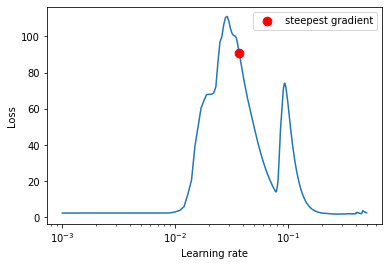

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.90, weight_decay=0.005)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, val_loader=testloader,end_lr=1, num_iter=100, step_mode="linear",diverge_th=50)
lr_finder.plot(log_lr=False) 
lr_finder.reset() 

# One Cycle Policy

In [ ]:
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []
learning_rates = []
epochs=24
max_epoch = 5
lrmax = 0.0372

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0013, momentum=0.9, weight_decay=0.005)
scheduler = OneCycleLR(optimizer=optimizer, max_lr=lrmax,epochs=epochs, steps_per_epoch=len(trainloader),
                       pct_start=5/epochs,div_factor=8)

In [ ]:
for epoch in range(epochs):
  print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
  train(model, device, trainloader, optimizer, scheduler, criterion, epoch,train_losses,train_accuracy )
  test(model, device, criterion, testloader,test_losses, test_accuracy )
  for param_group in optimizer.param_groups:
    learning_rates.append(param_group['lr']) 

EPOCH: 1 LR: 0.0046625


Loss=1.5085525512695312 Batch_id=97 Accuracy=37.21: 100%|██████████| 98/98 [01:10<00:00,  1.38it/s]



Test set: Average loss: 0.0027, Accuracy: 5047/10000 (50.47%)

EPOCH: 2 LR: 0.007791439524335968


Loss=0.9649098515510559 Batch_id=97 Accuracy=57.26: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0020, Accuracy: 6457/10000 (64.57%)

EPOCH: 3 LR: 0.0159783791180162


Loss=0.9965552091598511 Batch_id=97 Accuracy=65.01: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0020, Accuracy: 6789/10000 (67.89%)

EPOCH: 4 LR: 0.026083808845780057


Loss=0.8256962895393372 Batch_id=97 Accuracy=70.97: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0021, Accuracy: 6590/10000 (65.90%)

EPOCH: 5 LR: 0.034232520314141535


Loss=0.7946212291717529 Batch_id=97 Accuracy=75.89: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0012, Accuracy: 8012/10000 (80.12%)

EPOCH: 6 LR: 0.03729997345494064


Loss=0.6206362843513489 Batch_id=97 Accuracy=79.15: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0013, Accuracy: 7793/10000 (77.93%)

EPOCH: 7 LR: 0.03704043614941423


Loss=0.6073872447013855 Batch_id=97 Accuracy=81.12: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0015, Accuracy: 7535/10000 (75.35%)

EPOCH: 8 LR: 0.03627926204506317


Loss=0.4474305212497711 Batch_id=97 Accuracy=82.61: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]



Test set: Average loss: 0.0010, Accuracy: 8368/10000 (83.68%)

EPOCH: 9 LR: 0.03503721398722136


Loss=0.47413939237594604 Batch_id=97 Accuracy=84.14: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0010, Accuracy: 8284/10000 (82.84%)

EPOCH: 10 LR: 0.033348171809129086


Loss=0.4141963720321655 Batch_id=97 Accuracy=84.91: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0011, Accuracy: 8172/10000 (81.72%)

EPOCH: 11 LR: 0.03125820817840036


Loss=0.3397079408168793 Batch_id=97 Accuracy=86.02: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0009, Accuracy: 8466/10000 (84.66%)

EPOCH: 12 LR: 0.028824331854752888


Loss=0.385281503200531 Batch_id=97 Accuracy=87.01: 100%|██████████| 98/98 [01:09<00:00,  1.40it/s]



Test set: Average loss: 0.0009, Accuracy: 8436/10000 (84.36%)

EPOCH: 13 LR: 0.026112932639653724


Loss=0.3787233829498291 Batch_id=97 Accuracy=87.90: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]



Test set: Average loss: 0.0008, Accuracy: 8604/10000 (86.04%)

EPOCH: 14 LR: 0.02319797043560053


Loss=0.3444456160068512 Batch_id=97 Accuracy=88.32: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]



Test set: Average loss: 0.0007, Accuracy: 8742/10000 (87.42%)

EPOCH: 15 LR: 0.020158957812780542


Loss=0.28731682896614075 Batch_id=97 Accuracy=89.58: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]



Test set: Average loss: 0.0007, Accuracy: 8826/10000 (88.26%)

EPOCH: 16 LR: 0.01707879111342963


Loss=0.3073488175868988 Batch_id=97 Accuracy=90.20: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]



Test set: Average loss: 0.0008, Accuracy: 8753/10000 (87.53%)

EPOCH: 17 LR: 0.014041489255710762


Loss=0.328592449426651 Batch_id=97 Accuracy=90.90: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]



Test set: Average loss: 0.0007, Accuracy: 8847/10000 (88.47%)

EPOCH: 18 LR: 0.011129901916647492


Loss=0.2940394878387451 Batch_id=97 Accuracy=91.84: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0006, Accuracy: 9002/10000 (90.02%)

EPOCH: 19 LR: 0.008423449608907735


Loss=0.2682526111602783 Batch_id=97 Accuracy=92.74: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]



Test set: Average loss: 0.0006, Accuracy: 9041/10000 (90.41%)

EPOCH: 20 LR: 0.0059959572962520365


Loss=0.16389234364032745 Batch_id=97 Accuracy=93.81: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0005, Accuracy: 9194/10000 (91.94%)

EPOCH: 21 LR: 0.003913640640969439


Loss=0.14356978237628937 Batch_id=97 Accuracy=94.99: 100%|██████████| 98/98 [01:10<00:00,  1.38it/s]



Test set: Average loss: 0.0004, Accuracy: 9270/10000 (92.70%)

EPOCH: 22 LR: 0.0022332998132216786


Loss=0.0888848751783371 Batch_id=97 Accuracy=95.77: 100%|██████████| 98/98 [01:10<00:00,  1.38it/s]



Test set: Average loss: 0.0004, Accuracy: 9295/10000 (92.95%)

EPOCH: 23 LR: 0.0010007701304680836


Loss=0.1197352185845375 Batch_id=97 Accuracy=96.32: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0004, Accuracy: 9357/10000 (93.57%)

EPOCH: 24 LR: 0.00024967178948909094


Loss=0.08902829885482788 Batch_id=97 Accuracy=96.80: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]



Test set: Average loss: 0.0004, Accuracy: 9365/10000 (93.65%)



#graph

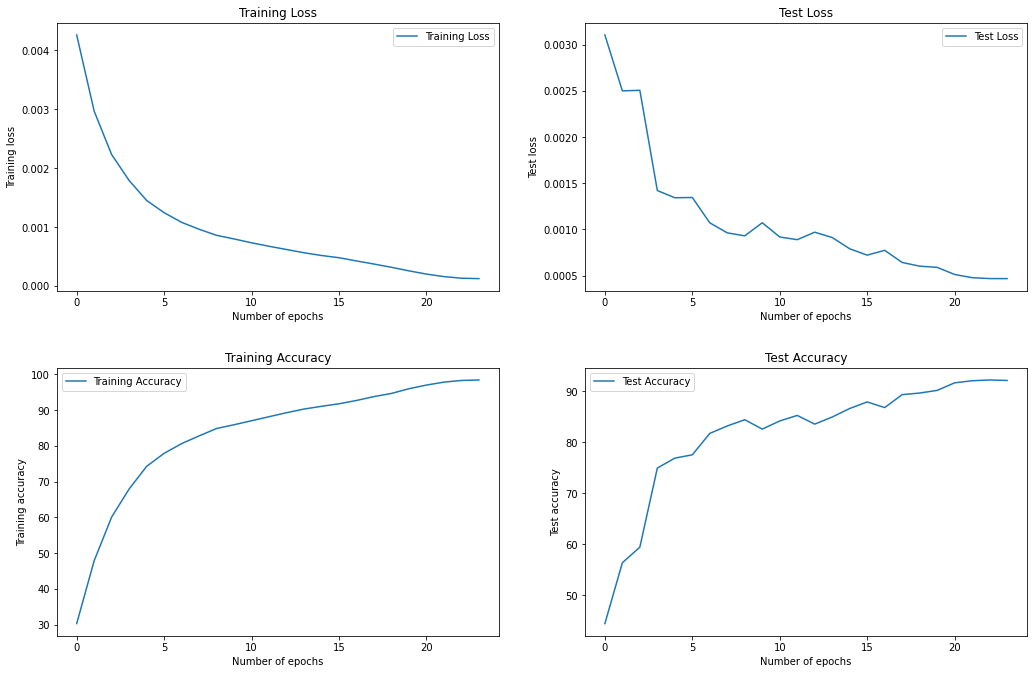

In [ ]:
plot_train_test__acc_loss(train_losses,train_accuracy, test_losses,  test_accuracy)